In [4]:
import gymnasium

In [5]:
env = gymnasium.make("CartPole-v1")

In [7]:
env.reset()
env.render()

/home/led/miniconda3/lib/python3.11/site-packages/gymnasium/envs/classic_control/cartpole.py:215: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym.make("CartPole-v1", render_mode="rgb_array")
  gym.logger.warn(


In [36]:
env.action_space.shape

()

In [1]:
import torch

In [9]:
torch.nn.init.calculate_gain('relu')

1.4142135623730951

In [86]:
a = torch.zeros(0, 4)

In [10]:
import numpy as np

In [12]:
b_inds = np.arange(4000)
b_inds

array([   0,    1,    2, ..., 3997, 3998, 3999])

In [17]:
a = np.random.shuffle(b_inds)

In [19]:
b_inds

array([2641, 3757, 3233, ..., 3782,  869,  969])

In [20]:
for start in range(0, 4000, 64):
    print(b_inds[start:start+64])

[2641 3757 3233 3461 2991 3605 3778  396  770 3939 3558  666  604 3176
 2651 3455  742 2899  361  191 2748 2379 1554 3555 1764 1467 1376    1
 3943 1179 2034 2622  990 2008  950 3308 3467 3767  540 1644 3565 3533
 2178 2979  493 2374 2139 1936 2700 2648 1109 3222 1469 3363 1913 1326
 3918 2407 2633 1922 1708 3310 1687 2079]
[1357 1259 1255 2354 2954 2176 2280  235 2434 1494 2529 3868 2783  399
 3435 1957 3273 1565 1831 2992 3771  324  939 2652 1810  323 1829 1450
 2068 1471  405 3975 1143 3669 3955 1915 1057 2579  390 3626 3318 2087
 1123 3703 1067 3407  844  649 3766  596 2902  150 2328 2486 2468  821
 1393  508 1877 1010 3440 1886 1703 2613]
[1788  707 2401 2495 1455 2855 2592 2687 1627  854  866 1488  912 3800
 3588 2469 2170  465 3821  422 1811  719 2297 3611 3246 2871 1293 3869
 1215 3154 1741  202 1857 2995 1867  187 2873 1284 1386  384 1384 2137
 1063  622 1449 1041 1675  966 1851  914 1250  109  147 3152  139 1006
 1751   74 3293 2933   43 1515 1121  162]
[2014 2111 2519 3170  

In [117]:
b = torch.tensor(
    # [1]
    [1, 2, 3]
    )

In [47]:
torch.squeeze(b, -1) 

tensor(1)

In [116]:
torch.tensor(
    # [1]
    [1]
    ).unsqueeze(dim=0)

tensor([[1]])

In [121]:
torch.cat((b, b), dim=0)

tensor([1, 2, 3, 1, 2, 3])

In [19]:
b.numpy()[::-1]

array([4, 3, 2, 1])

In [22]:
b.flip(0)

tensor([4, 3, 2, 1])

In [20]:
import numpy as np

In [54]:
np.zeros((0, env.action_space.shape))

TypeError: 'tuple' object cannot be interpreted as an integer

In [65]:
np.concatenate((
    # np.array([1]),
    # np.zeros(0), 
    np.array(1),
    np.array(0)
), axis=0)

ValueError: zero-dimensional arrays cannot be concatenated

In [36]:
a = [1, 2,3]
a.extend(a*2)
a

[1, 2, 3, 1, 2, 3, 1, 2, 3]

In [28]:
np.append(np.zeros(0), 1)

array([1.])

In [17]:
import scipy

In [24]:
out = scipy.signal.lfilter([1], [1, float(-1)], b.flip(0), axis=0)[::-1]

In [25]:
out

numpy.ndarray

In [16]:
import scipy

In [10]:
env.action_space

Discrete(2)

In [66]:
from agent import ActorCritic

In [67]:
from torchviz import make_dot

In [68]:
agent = ActorCritic(
    env.observation_space,
    env.action_space,
)

In [71]:
env.observation_space.shape

(4,)

In [73]:
out = agent.step(torch.rand(4))

In [79]:
agent

ActorCritic(
  (policy): MLP(
    (stem): Sequential(
      (0): Linear(in_features=4, out_features=64, bias=True)
      (1): Linear(in_features=64, out_features=64, bias=True)
      (2): Linear(in_features=64, out_features=2, bias=True)
    )
  )
  (value): MLP(
    (stem): Sequential(
      (0): Linear(in_features=4, out_features=64, bias=True)
      (1): Linear(in_features=64, out_features=64, bias=True)
      (2): Linear(in_features=64, out_features=1, bias=True)
    )
  )
)

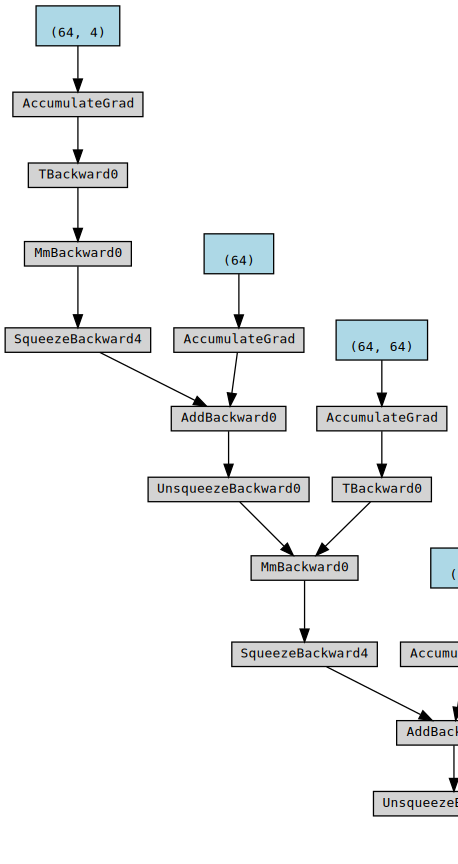

In [78]:
make_dot(out[-1])